<a href="https://colab.research.google.com/github/liamhall64/Habitable-Exomoons/blob/main/Randomise_Orbital_Simulations_and_TTVs_160924.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const

#Orbital Simulations
######Using a Monte Carlo (repeating a function $N$ amount of times) and randomising the angle at which a moon is observed around a planet - known as realisation.

In [45]:
def barycentre(Mp, Mm, dpm, moon_period):
  dp = dpm/(1+(Mp/Mm)) # DIST BARYCENTRE TO PLANET
  dm = dpm/(1+(Mm/Mp)) # DIST BARYCENTRE TO MOON
  print(f'Planet-barycentre distance = {dp:.3f}\nMoon-barycentre distance = {dm:.3f}')
  return(dp, dm)

In [46]:
# PARAMETERS
Mp = 1*const.M_earth
Mm = 0.0123*const.M_earth
dpm = 0.3844e9*u.m
moon_period = 27.322*u.day
P = 1*u.year
P = P.to(u.day)

dp, dm = barycentre(Mp, Mm, dpm, moon_period)

Planet-barycentre distance = 4670670.750 m
Moon-barycentre distance = 379729329.250 m


In [47]:
t = np.linspace(0, 2*P, 1000)

N = 2 # NUMBER OF ANGLES

angle = []
def position(N):
  for i in range(N):
    angle.append(np.random.uniform(0, 2*np.pi)*u.rad)
    #print(f"Start angle #{i+1} = {angle[i]:.3f}") # IF WE WANT TO PRINT THE LIST OF ALL STARTING ANGLES OF 'N' REALISATIONS

    # BARYCENTRE
    ab = 1*const.au # SEPARATION
    Pb = P.to(u.s)  # PERIOD
    wb = (2*np.pi/Pb) *u.rad # ANGULAR FREQ
    alphab = wb*t
    xb = ab*np.sin(alphab)

    # PLANET
    wp = 2*np.pi/moon_period *u.rad
    alphap = wp*t + angle[i]
    xp = dp * np.sin(alphap) + xb

    # MOON
    wm = 2*np.pi/moon_period *u.rad
    alpham = wm*t + np.pi*u.rad + angle[i]
    xm = dm*np.sin(alpham) + xb

    '''
    plt.figure(figsize=(17, 6))
    plt.subplot(2, 2, 1)
    plt.plot(t/P, xb/ab.to(u.m), label = f'Barycentre')
    plt.plot(t/P, xp/ab.to(u.m), label = f'Planet')
    plt.plot(t/P, xm/ab.to(u.m), label = f'Moon')
    plt.legend()
    plt.title(f'Orbital simulations for barycentre, planet and\nmoon with starting angle for planet: {alphap[i].to(u.deg):.0f}')
    plt.grid(True)
    plt.xlabel('Time (years)')
    plt.ylabel('Distance from line of sight (AU)')
    plt.tight_layout()

    # TEST TO SEE IF THE ANGLES ARE RANDOMISED
    a = alphap[i]-alpham[i]
    print(f'{a}')
    '''
  return angle, xb, xp, xm, wb, wp, wm, ab, alphap, alpham


angle, xb, xp, xm, wb, wp, wm, ab, alphap, alpham = position(N)
print('Done')

Done


#TTV calculations
######Using the previous values of angles to calculate the TTVs for moon and planet

1/2 - The first transit TTV for planet and moon:
Planet TTV = -94.567 s
Moon TTV = 7688.409 s


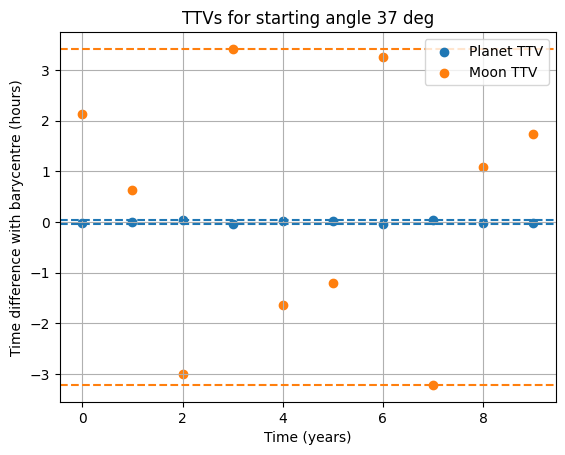

2/2 - The first transit TTV for planet and moon:
Planet TTV = 142.051 s
Moon TTV = -11548.860 s


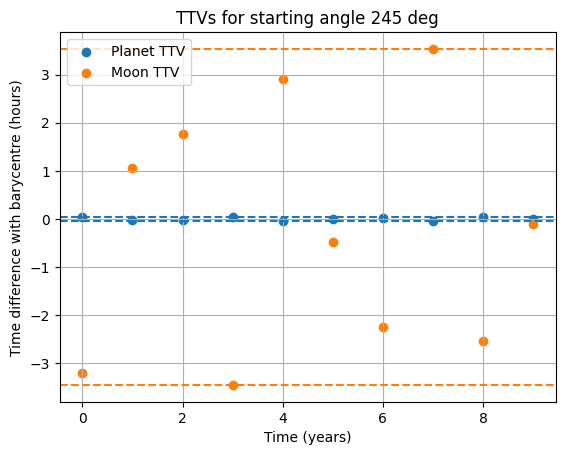

In [81]:
num_of_tran = 10 # NUMBER OF TRANSITS
t = np.arange(0,num_of_tran*P.value,P.value)*P.unit # TIME

ttvp = []
ttvm = []
for angles in angle:
  # BARYCENTRE
  alphab = wb*t
  xb = ab*np.sin(alphab)
  # PLANET
  wp = 2*np.pi/moon_period *u.rad
  alphap = wp*t + angles # USING THE ANGLE FROM THE PREVIOUS CELL
  xp = dp * np.sin(alphap) + xb
  # MOON
  wm = 2*np.pi/moon_period *u.rad
  alpham = wm*t + np.pi*u.rad + angles
  xm = dm*np.sin(alpham) + xb


  diffp = xb - xp
  diffm = xb - xm

  vb = (2*np.pi*ab)/P.to(u.s) # BARYCENTRE VELOCITY
  #print(f'Velocity of system around star = {vb:.3f}')

  ttvp.append(diffp/vb)
  ttvm.append(diffm/vb)

for i in range(N):
  print(f'{(i+1)}/{N} - The first transit TTV for planet and moon:')
  print(f'Planet TTV = {ttvp[i][0]:.3f}\nMoon TTV = {ttvm[i][0]:.3f}')

  plt.figure()
  plt.scatter(t/P, ttvp[i].to(u.h), label = 'Planet TTV')
  maxp = np.max(ttvp[i]).to(u.h)
  minp = np.min(ttvp[i]).to(u.h)

  plt.scatter(t/P, ttvm[i].to(u.h), label = 'Moon TTV')
  maxm = np.max(ttvm[i]).to(u.h)
  minm = np.min(ttvm[i]).to(u.h)

  plt.axhline(y = maxp.value, linestyle = 'dashed', color = 'tab:blue')
  plt.axhline(y = minp.value, linestyle = 'dashed', color = 'tab:blue')
  plt.axhline(y = maxm.value, linestyle = 'dashed', color = 'tab:orange')
  plt.axhline(y = minm.value, linestyle = 'dashed', color = 'tab:orange')

  plt.title(f'TTVs for starting angle {angle[i].to(u.deg):.0f}')
  plt.xlabel('Time (years)')
  plt.ylabel('Time difference with barycentre (hours)')
  plt.grid()
  plt.legend()
  plt.show()

In [27]:
for i in range(len(ttvp)):
  print(f'TTV list for planets for {i} random starting angles:\n{ttvp[i]}')
  print(f'TTV list for moons for {i} random starting angles:\n{ttvm[i]}\n')

TTV list for planets for 0 random starting angles:
[  90.00694872 -155.44236634  120.44433034   -7.62555378 -110.12019809
  156.71577343 -102.0551293   -18.54473935  127.16259652 -153.61894882] s
TTV list for moons for 0 random starting angles:
[ -7317.63810731  12637.59075905  -9792.22197923    619.9637223
   8952.86163362 -12741.11979121   8297.16498379   1507.70238639
 -10338.42248098  12489.34543211] s

TTV list for planets for 1 random starting angles:
[ -65.41711834  149.17955166 -136.55502218   35.70041227   88.22072567
 -155.1412378   121.82285961   -9.79305411 -108.56417852  156.77660029] s
TTV list for moons for 1 random starting angles:
[  5318.46490577 -12128.41883416  11102.03432388  -2902.47254216
  -7172.41672127  12613.10876414  -9904.29752952    796.18326127
   8826.35597695 -12746.06506382] s



#Light Curve Simulations

In [7]:
!pip install pytransit celerite emcee corner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.0/308.0 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.1/698.1 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.5 MB/s eta 0:00:00


In [8]:
from pytransit import QuadraticModel
from scipy.optimize import minimize

/usr/local/lib/python3.10/dist-packages/pytools/persistent_dict.py:63: RecommendedHashNotFoundWarning: Unable to import recommended hash 'siphash24.siphash13', falling back to 'hashlib.sha256'. Run 'python3 -m pip install siphash24' to install the recommended hash.
  warn("Unable to import recommended hash 'siphash24.siphash13', "


In [36]:
ttvp = np.array(ttvp)*u.s # USING THE FIRST TTV CALCULATIONS FROM THE FIRST RANDOM STARTING ANGLE
ttvp = ttvp.to(u.day)
ttvp

<Quantity [[ 2.16368276e-28, -3.73668892e-28,  2.89536891e-28,
            -1.83311172e-29, -2.64718644e-28,  3.76730043e-28,
            -2.45330974e-28, -4.45798167e-29,  3.05686974e-28,
            -3.69285567e-28],
           [-1.57256626e-28,  3.58613672e-28, -3.28265485e-28,
             8.58204478e-29,  2.12074363e-28, -3.72945007e-28,
             2.92850746e-28, -2.35415850e-29, -2.60978118e-28,
             3.76876265e-28]] d>